In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
energy = pd.read_csv("EnergyRaw.csv")
energy.shape

(450, 26)

In [3]:
NrCompanies = energy["Company Name"].str.lower().unique().shape
NrCompanies

(439,)

In [4]:
energy['City_Clean'] = energy['City'].str.lower().str.split(",").str.get(0).str.split(" ").str.get(0)
energy.to_csv("energy.csv")
QueensJobsCreated = energy.groupby('City_Clean')['Job created'].sum()['queens']
QueensJobsCreated

90.0

In [5]:
UniqueEmail = energy['company email'].str.lower().str.split("@").str.get(-1).nunique()
UniqueEmail

361

In [6]:
JobAndSave = energy.groupby(['NTA']).mean()[energy.groupby(['NTA']).count()['Company Name']>5][['Total Savings','Job created']]
JobAndSave.to_csv("JobAndSave.csv")
JobAndSave

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,NaN
Bushwick South,26140.455000,10.000000
Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
College Point,17159.372857,2.000000
Crown Heights North,4036.298889,NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
East New York,48433.093333,15.000000
East Williamsburg,13990.626364,NaN
Greenpoint,9753.649286,NaN


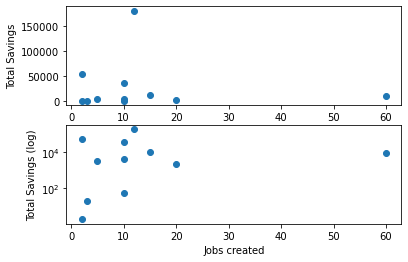

In [7]:
plt.figure()
plt.subplot(211)
plt.scatter(energy['Job created'],energy['Total Savings'])  # same as 'JobAndSave.pd"
plt.xlabel("Jobs created")
plt.ylabel("Total Savings")

plt.subplot(212)
plt.scatter(energy['Job created'],energy['Total Savings']) # same as 'JobAndSave.pd"
plt.xlabel("Jobs created")
plt.ylabel("Total Savings (log)")
plt.yscale('log')

plt.show()

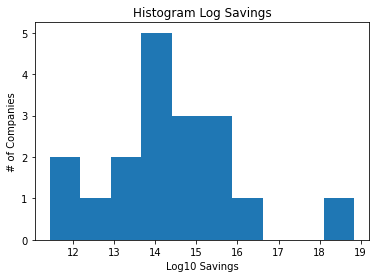

In [8]:
plt.figure()
plt.subplot(111)
plt.hist(np.log2(JobAndSave['Total Savings']),10)
plt.xlabel('Log10 Savings')
plt.ylabel('# of Companies')
plt.title('Histogram Log Savings')
plt.show()

In [9]:
energy['Effective Date'] = pd.to_datetime (energy['Effective Date'])
energy["Month"] = energy["Effective Date"].dt.to_period('M')
#energy["Month"] = energy["Effective Date"] - energy["Effective Date"].min()
#energy["TimeElapsed"] = energy["Month"] - energy["Month"].min()
#energy["Days"] = energy["Effective Date"] - energy["Effective Date"].min()
#pd.set_option('display.max_columns', None)

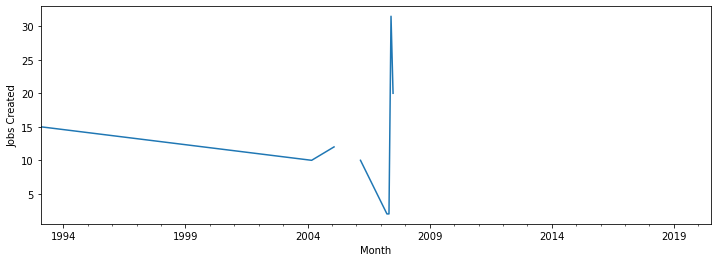

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))
energy.groupby(['Month']).mean()['Job created'].plot(kind='line')
plt.ylabel('Jobs Created')
plt.show()
# I did not interpret nan's as '0' because it may be missing data that is not 0. Similarly, I kept the axis to 2019 for completeness